# 뉴스 기사 분류 : 다중분류 문제
- p160, 1986년 로이터 데이터셋
- 46개의 토픽 존재
- 10개의 샘플 존재

## 로이터 데이터셋 가져오기

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## 디코딩

In [5]:
word_index = reuters.get_word_index()
reverse_word_index =  dict(
    [(value, key) for (key, value) in word_index.items()])

decode_newswire = " ".join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

decode_newswire

550378/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
train_labels # 토픽의 인덱스가 0~45 사이 정수

array([ 3,  4,  3, ..., 25,  3, 25])

## 인코딩
- (비유적)독립변수 전체를 벡터 변환

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.

  return results

In [8]:
x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

- 종속변수 전체 인코딩 ==> 범주형 인코딩

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
y_test = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [10]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels) # 범주형 형태로 설정
y_test = to_categorical(test_labels) # 범주형 형태로 설정

y_train.shape, y_test.shape

((8982, 46), (2246, 46))

## 모델 만들기

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax') # 3개이상 분류는 softmax
])

# 모델 컴파일하기
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", # 2차원 배열
              metrics=["accuracy"])

## 검증 세트 준비

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## 모델 훈련하기

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 76ms/step - loss: 2.6539 - accuracy: 0.4786 - val_loss: 1.8109 - val_accuracy: 0.6020
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.5487 - accuracy: 0.6669 - val_loss: 1.4011 - val_accuracy: 0.6760
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.1990 - accuracy: 0.7362 - val_loss: 1.2068 - val_accuracy: 0.7220
Epoch 4/20
16/16 [==============================] - 1s 53ms/step - loss: 0.9844 - accuracy: 0.7856 - val_loss: 1.0964 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 1s 55ms/step - loss: 0.8220 - accuracy: 0.8207 - val_loss: 1.0403 - val_accuracy: 0.7630
Epoch 6/20
16/16 [==============================] - 1s 55ms/step - loss: 0.6834 - accuracy: 0.8503 - val_loss: 0.9582 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5775 - accuracy: 0.8753 - val_loss: 0.9237 - val_accuracy: 0.8090
Epoch 8/20
16

## 훈련과 검증 데이터의 손실과 정확도 그래프 그리기

In [25]:
import matplotlib.pyplot as plt

def vis(history):
  history_dict = history.history
  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]
  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  epochs = range(1, len(loss_values) + 1)

  figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 8))

  ax[0].plot(epochs, loss_values, "bo", label="Training loss")
  ax[0].plot(epochs, val_loss_values, "b", label="Validation loss")
  ax[0].set_title("Training and validation loss")
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Loss")
  ax[0].legend()

  ax[1].plot(epochs, acc, "bo", label="Training acc")
  ax[1].plot(epochs, val_acc, "b", label="Validation acc")
  ax[1].set_title("Training and validation accuracy")
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Accuracy")
  ax[1].legend()

  plt.show()

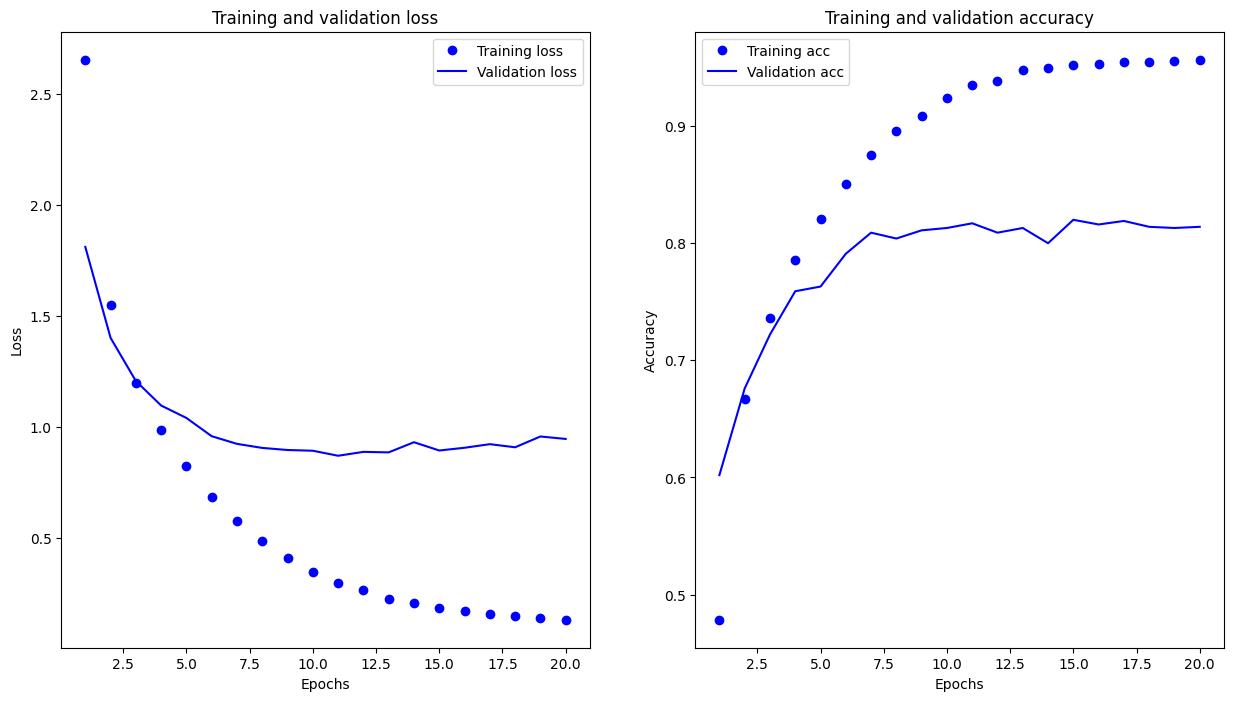

In [26]:
vis(history)

## 모델 재훈련

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax') # 3개이상 분류는 softmax
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs = 9,
          batch_size = 512)

Epoch 1/9
18/18 [==============================] - 2s 51ms/step - loss: 2.7835 - accuracy: 0.4972
Epoch 2/9
18/18 [==============================] - 1s 73ms/step - loss: 1.5984 - accuracy: 0.6515
Epoch 3/9
18/18 [==============================] - 1s 81ms/step - loss: 1.2190 - accuracy: 0.7375
Epoch 4/9
18/18 [==============================] - 1s 65ms/step - loss: 0.9854 - accuracy: 0.7861
Epoch 5/9
18/18 [==============================] - 1s 47ms/step - loss: 0.8154 - accuracy: 0.8240
Epoch 6/9
18/18 [==============================] - 1s 46ms/step - loss: 0.6831 - accuracy: 0.8519
Epoch 7/9
18/18 [==============================] - 1s 48ms/step - loss: 0.5725 - accuracy: 0.8800
Epoch 8/9
18/18 [==============================] - 1s 50ms/step - loss: 0.4829 - accuracy: 0.8987
Epoch 9/9
18/18 [==============================] - 1s 45ms/step - loss: 0.4101 - accuracy: 0.9141


In [17]:
results = model.evaluate(x_test, y_test)
results

71/71 [==============================] - 0s 3ms/step - loss: 0.9138 - accuracy: 0.7988


[0.9137669205665588, 0.7987533211708069]

## 랜덤 분류기 정확도 확인

In [18]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1772039180765806

## 새로운 데이터에 대해 예측

In [19]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 3ms/step


(46,)

In [20]:
np.sum(predictions[0])

1.0000001

In [21]:
np.argmax(predictions[0])

3

## 정수 텐서로 변환하는 인코딩하여 진행

In [22]:
y_train = np.array(train_labels) # 정수형태로 설정
y_test = np.array(test_labels) # 정수형태로 설정

y_train.shape, y_test.shape # 1차원 배열

((8982,), (2246,))

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [24]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax') # 3개이상 분류는 softmax
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", # np.array(train_labels)로 1차원 배열이므로 loss함수 다르게 설정
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=5,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/5
16/16 [==============================] - 2s 68ms/step - loss: 2.7309 - accuracy: 0.4907 - val_loss: 1.8839 - val_accuracy: 0.6240
Epoch 2/5
16/16 [==============================] - 1s 54ms/step - loss: 1.5714 - accuracy: 0.6729 - val_loss: 1.4040 - val_accuracy: 0.6770
Epoch 3/5
16/16 [==============================] - 1s 86ms/step - loss: 1.2000 - accuracy: 0.7414 - val_loss: 1.2167 - val_accuracy: 0.7210
Epoch 4/5
16/16 [==============================] - 1s 90ms/step - loss: 0.9814 - accuracy: 0.7904 - val_loss: 1.0938 - val_accuracy: 0.7630
Epoch 5/5
16/16 [==============================] - 1s 64ms/step - loss: 0.8187 - accuracy: 0.8224 - val_loss: 1.0108 - val_accuracy: 0.7860
